In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

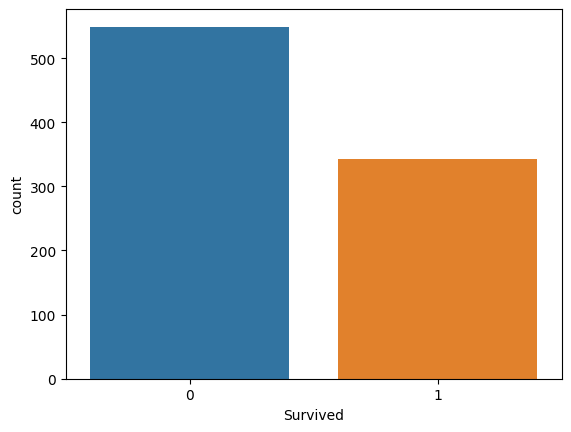

In [3]:
sns.countplot(x='Survived',data=train_data)

<Axes: xlabel='Pclass', ylabel='count'>

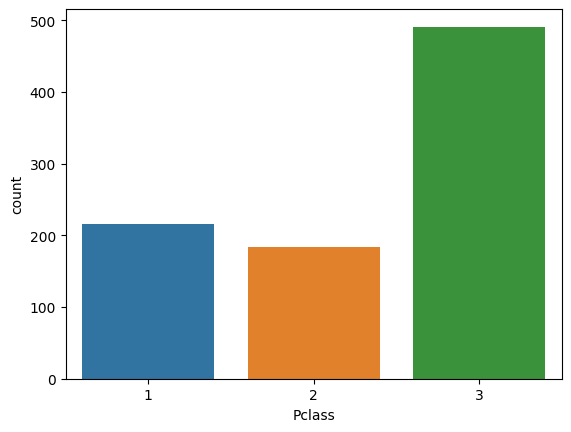

In [4]:
sns.countplot(x='Pclass',data=train_data)

<Axes: xlabel='Survived', ylabel='count'>

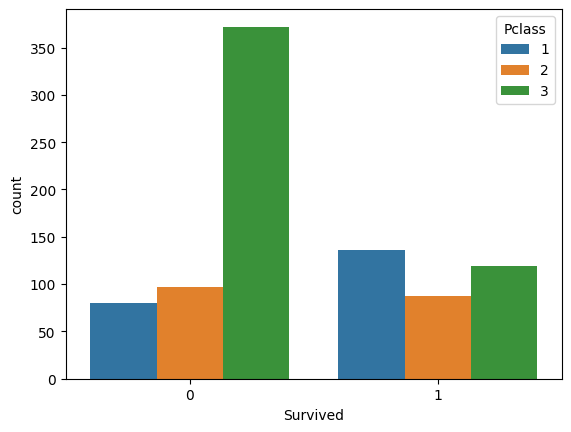

In [5]:
sns.countplot(x='Survived',data=train_data,hue='Pclass')

In [6]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)


% of women who survived: 0.7420382165605095


In [8]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [9]:
from sklearn.ensemble import RandomForestClassifier

train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"]
# Create the FamilySize feature for the test data
test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"]


age_bins = [0, 18, 30, 50, float('inf')]  # Define the age bins
age_labels = ['Child', 'Young Adult', 'Adult', 'Senior']  # Define labels for each bin
train_data['AgeCategory'] = pd.cut(train_data['Age'], bins=age_bins, labels=age_labels)
test_data['AgeCategory'] = pd.cut(test_data['Age'], bins=age_bins, labels=age_labels)

fare_bins = [0, 13, 30, 80, float('inf')]  # Define the age bins
fare_labels = ['low', 'medium', 'high', 'extreme']  # Define labels for each bin

# Apply the categorization to the DataFrame
train_data['FareCategory'] = pd.cut(train_data['Fare'], bins=fare_bins, labels=fare_labels)
test_data['FareCategory'] = pd.cut(train_data['Fare'], bins=fare_bins, labels=fare_labels)

y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch","AgeCategory","FareCategory"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [10]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,AgeCategory,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Young Adult,low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Adult,high
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Young Adult,low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Adult,high
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Adult,low


In [11]:
ticket1 = train_data.loc[train_data.Pclass == 1]["Survived"]
rate_ticket1 = sum(ticket1)/len(ticket1)

print("% of ticket1 who survived:", rate_ticket1)

% of ticket1 who survived: 0.6296296296296297


In [12]:
ticket2 = train_data.loc[train_data.Pclass == 2]["Survived"]
rate_ticket2 = sum(ticket2)/len(ticket2)

print("% of ticket2 who survived:", rate_ticket2)


% of ticket2 who survived: 0.47282608695652173


In [13]:
ticket3 = train_data.loc[train_data.Pclass == 3]["Survived"]
rate_ticket3 = sum(ticket3)/len(ticket3)

print("% of ticket3 who survived:", rate_ticket3)

% of ticket3 who survived: 0.24236252545824846


/tmp/ipykernel_32/4187802044.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Age'],kde=False)


<Axes: xlabel='Age'>

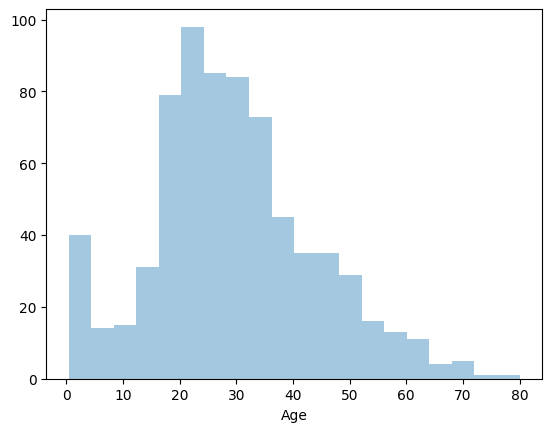

In [14]:
sns.distplot(train_data['Age'],kde=False)

<Axes: xlabel='Pclass', ylabel='Age'>

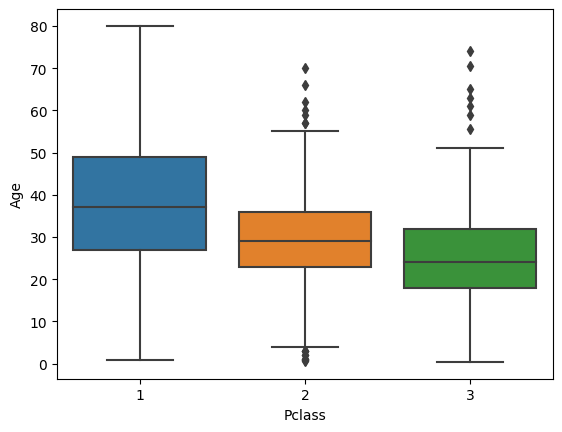

In [15]:
sns.boxplot(x='Pclass',y='Age',data=train_data)

<Axes: xlabel='Pclass', ylabel='Cabin'>

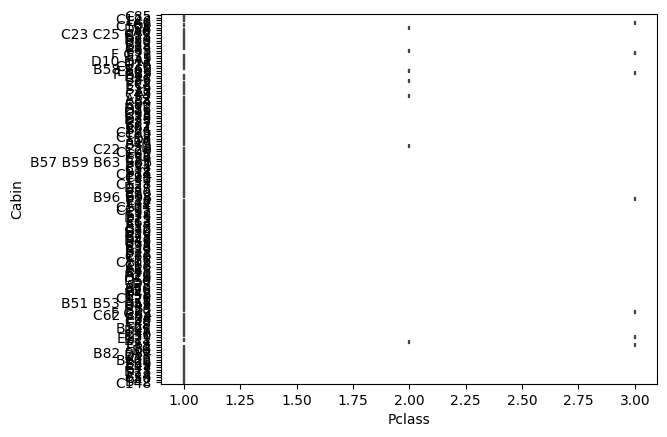

In [16]:
sns.boxplot(x='Pclass',y='Cabin',data=train_data)

<Axes: xlabel='Survived', ylabel='count'>

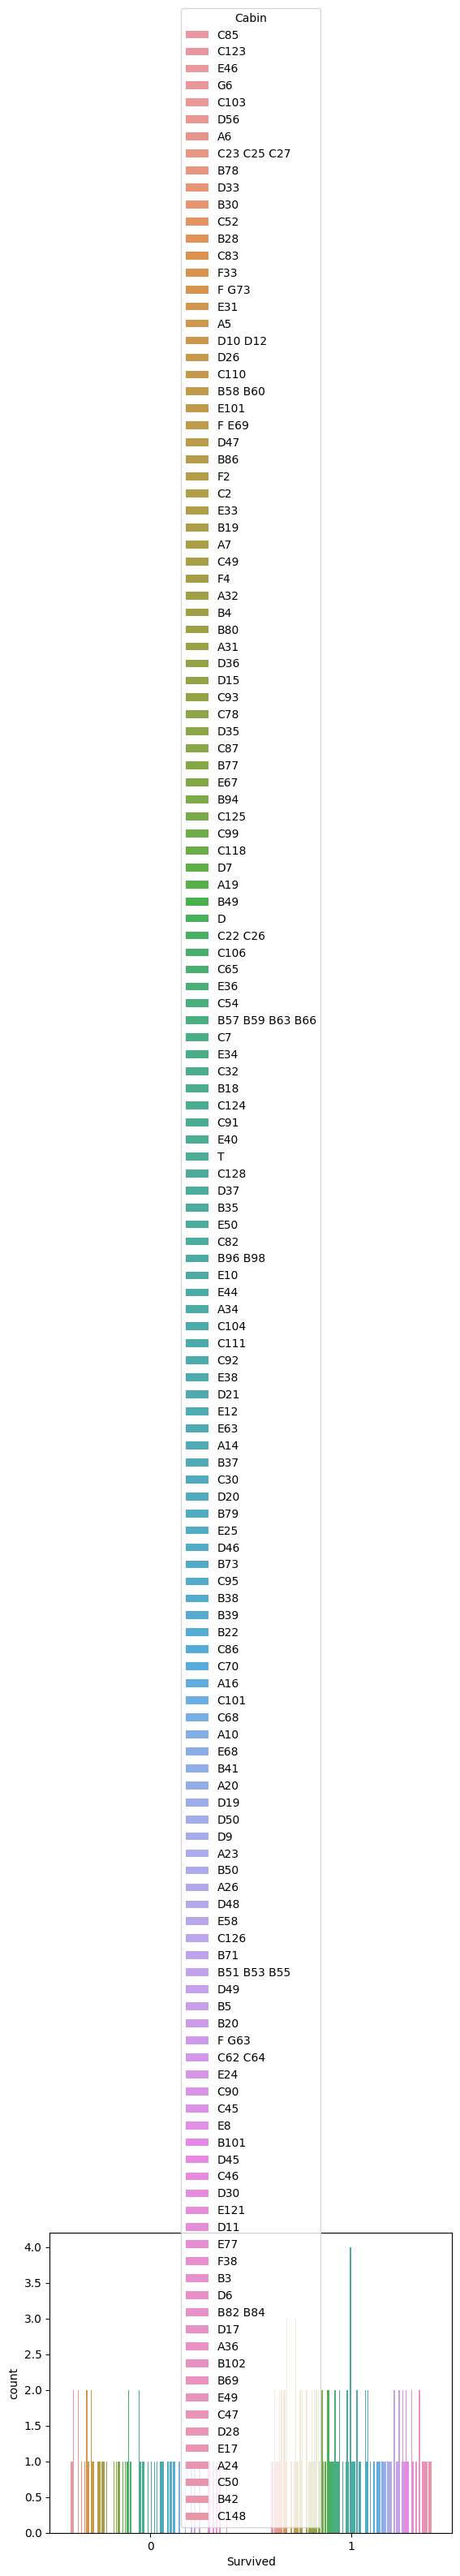

In [17]:
sns.countplot(x='Survived',data=train_data,hue='Cabin')


<Axes: xlabel='Survived', ylabel='count'>

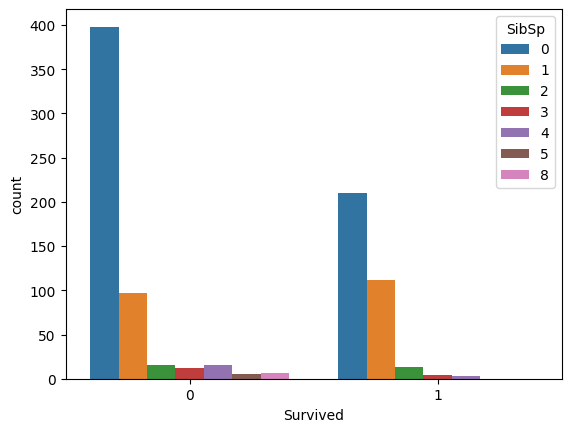

In [18]:
sns.countplot(x='Survived',data=train_data,hue='SibSp')

<Axes: xlabel='Survived', ylabel='count'>

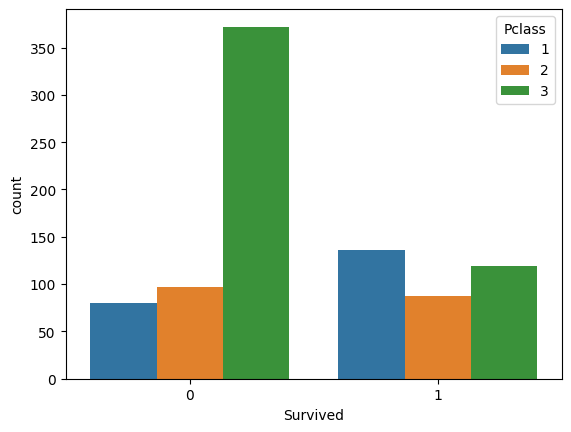

In [19]:
sns.countplot(x='Survived',data=train_data,hue='Pclass')

<Axes: xlabel='Survived', ylabel='count'>

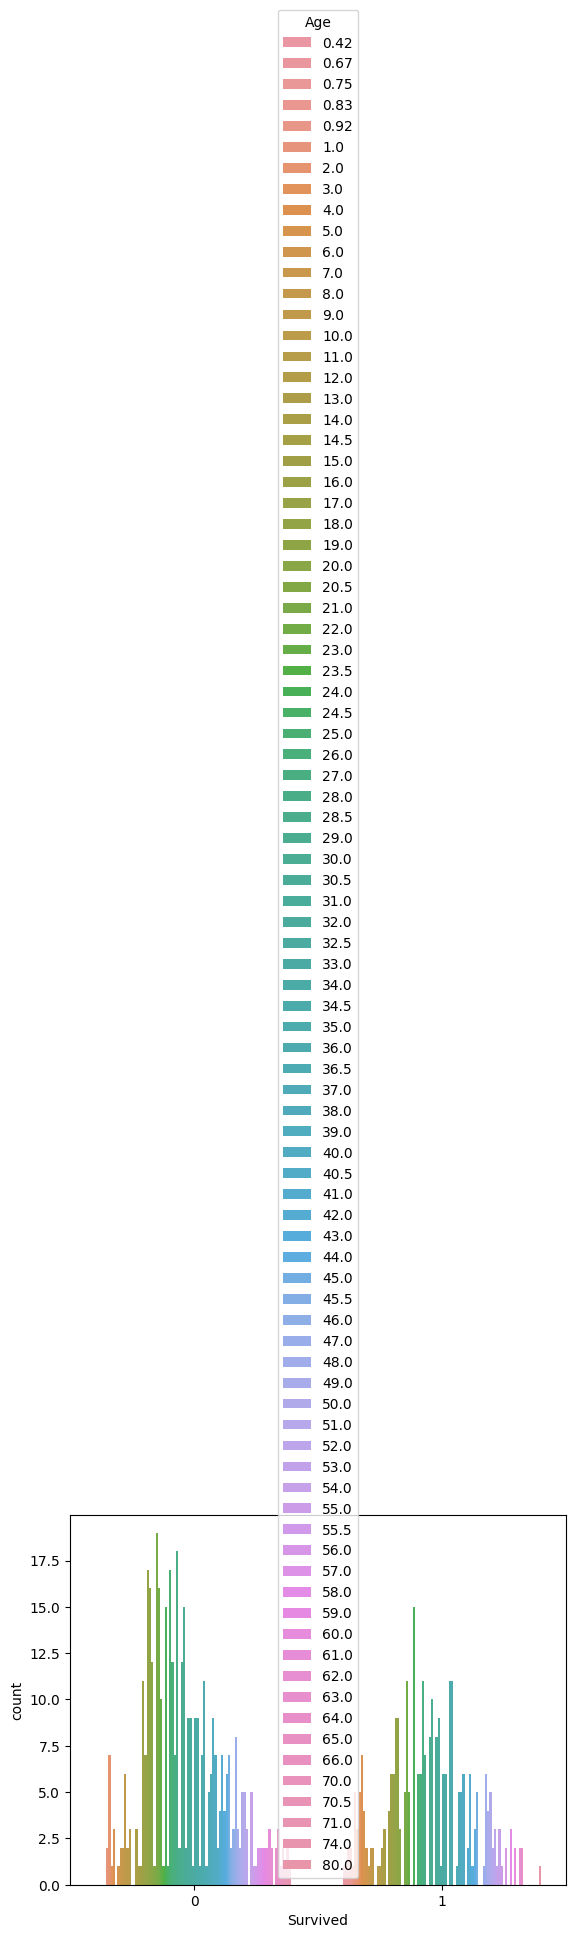

In [20]:
sns.countplot(x='Survived',data=train_data,hue='Age')

<Axes: xlabel='Survived', ylabel='count'>

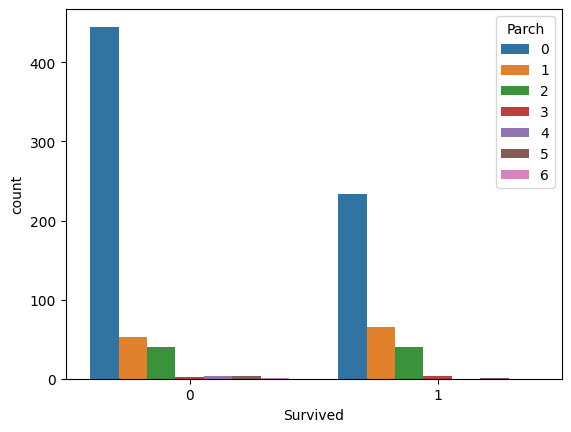

In [21]:
sns.countplot(x='Survived',data=train_data,hue='Parch')

In [ ]:
sns.countplot(x='Survived',data=train_data,hue='Fare')

<Axes: xlabel='Survived', ylabel='count'>

In [ ]:
age_bins = [0, 18, 30, 50, float('inf')]  # Define the age bins
age_labels = ['Child', 'Young Adult', 'Adult', 'Senior']  # Define labels for each bin

# Apply the categorization to the DataFrame
train_data['AgeCategory'] = pd.cut(train_data['Age'], bins=age_bins, labels=age_labels)

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))  # Adjust the figure size if needed

# Use hue to color bars by "Survived"
sns.countplot(x='AgeCategory', data=train_data, hue='Survived', palette='Set1')

# Customize the plot
plt.title('Passenger Count by Age Category and Survival')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])  # Add a legend

# Show the plot
plt.show()

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))  # Adjust the figure size if needed
sns.countplot(x='AgeCategory', data=train_data, palette="Set1")

# Customize the plot
plt.title('Passenger Count by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')

# Show the plot
plt.show()

In [ ]:
fare_bins = [0, 13, 30, 80, float('inf')]  # Define the age bins
fare_labels = ['low', 'medium', 'high', 'extreme']  # Define labels for each bin

# Apply the categorization to the DataFrame
train_data['FareCategory'] = pd.cut(train_data['Fare'], bins=fare_bins, labels=fare_labels)
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))  # Adjust the figure size if needed

# Use hue to color bars by "Survived"
sns.countplot(x='FareCategory', data=train_data, hue='Survived', palette='Set1')

# Customize the plot
plt.title('Passenger Count by fare Category and Survival')
plt.xlabel('Fare
           Category')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])  # Add a legend

# Show the plot
plt.show()